In [12]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
%matplotlib inline

In [13]:
# I like bigger plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Comparing multiple distributions

This simple notebook is created to compare ways to display distributions. Here in particular I want to show how to compare multiple distributions.

In [14]:
centre1 = [1.0, 1.3, 2.8, 1.8, 4.5, 7.6]
scale1 = [0.6, 0.3, 0.7, 1.5, 1.2, 0.7]
centre2 = [None, None, 0.5, 3.2, None, 2.5]
scale2 = [1.0, 1.0, 0.7, 0.6, 1.0, 0.9]
norm = [1.0, 1.0, 0.8, 1.7, 1.0, 1.0]

N_ref= 100

In [15]:
d = dict()

# I also want to count the total number of data points
n_total_data = 0
for i in range(len(centre1)):
    x_r1 = np.random.normal(centre1[i], scale1[i], size=N_ref)
    if centre2[i] is None:
        pass
    else:
        x_r2 = np.random.normal(centre2[i], scale2[i], size=int(N_ref*norm[i]))
        x_r1 = np.append(x_r1, x_r2)
        
    d[i] = x_r1
    n_total_data += len(x_r1)

## Showing the data fully

This plots points in vertical strips. There are various ways to do this. I will first use a simple approach using matplotlib and then show a more complex, but powerful way to convert the data into a form useful for Seaborn.

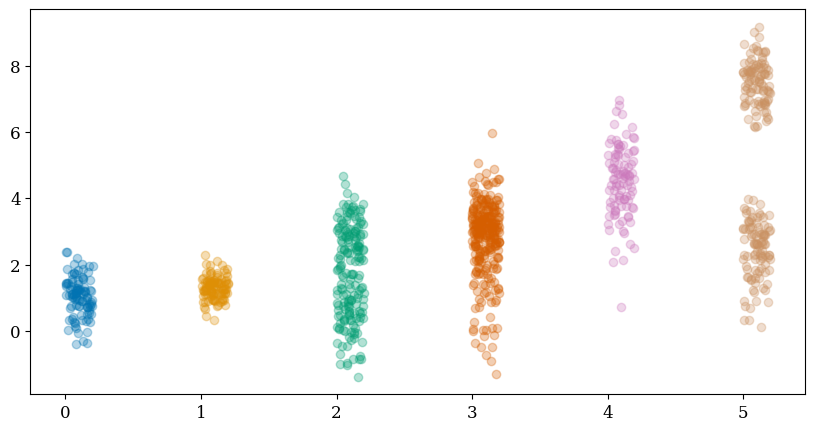

In [16]:
fig, ax = plt.subplots(ncols=1)

# I need to know the number of columns to show
n_columns = len(d.keys())
# Allow some jitter to show the data better.
jitter = 0.2

for i in range(n_columns):
    y = d[i]
    x = i+np.random.uniform(size=len(y))*jitter
    ax.scatter(x, y, alpha=0.3)


To show this using `stripplot` in seaborn we need to massage the data a bit. We need now to have one vector with all data and another with the id of each. 

In [17]:
data_vector = np.zeros(n_total_data)
label_vector = np.zeros(n_total_data, int) # This could instead be a string array for instance.

In [18]:
i_start = 0
for i in range(n_columns):
    y = d[i]
    i_end = i_start + len(y)
    data_vector[i_start:i_end] = y
    label_vector[i_start:i_end] = i
    i_start = i_end

In [19]:
ds = {'y': data_vector, 'x': label_vector}

/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='x', ylabel='y'>

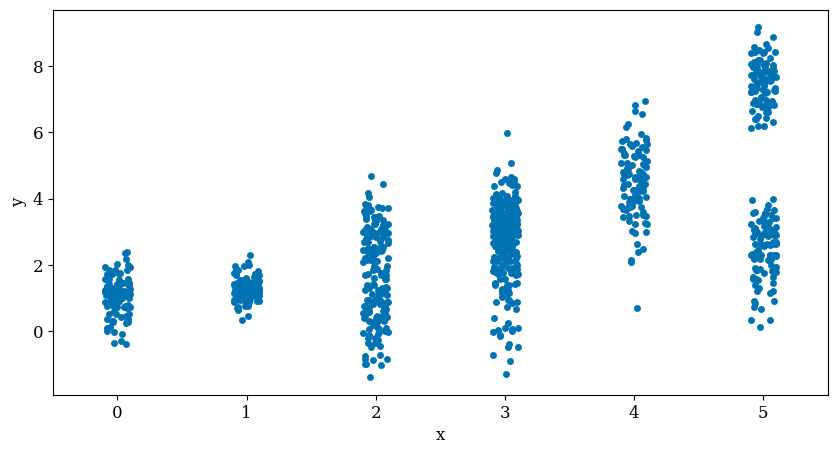

In [20]:
sns.stripplot(x='x', y='y', data=ds)

## Silly histograms

Next, try to compare these by overplotting histograms.

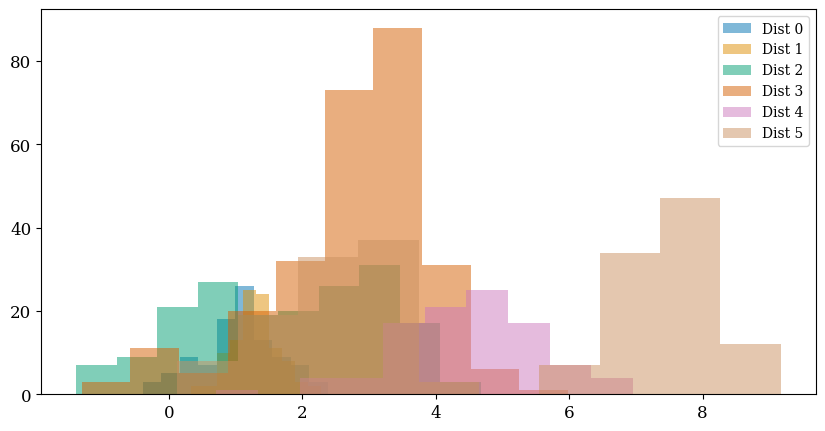

In [21]:
for i in range(len(d.keys())):
    plt.hist(d[i], label="Dist {0}".format(i), alpha=0.5)

plt.legend()

## Layered histograms

We could imagine making multiple histograms that are one above the other.

In [22]:
def plothist(x, bins='auto', yoffset=0, color=None, norm=False, peak=None,
             fill=False, ax=None, **kwargs):
    """Convenience function for manually plotting a histogram
    
    This allows for a flexible baselevel
    """
    
    if ax is None:
        fig, ax = plt.subplots()
    
    yhist, xbins = np.histogram(x, bins=bins, density=norm)
    if peak is not None:
        yhist = peak*yhist/np.max(yhist)

    # But to get the edges of the histogram in the plot,
    # we need to pad these a bit.
    xhist = np.hstack([xbins[0], xbins, xbins[-1]])
    yhist = np.hstack([0, yhist[0], yhist, 0])
    
    try:
        col = kwargs['c']
    except:
        col = None
    
    # Finally, to make a histogram plot we use step and fill_between
    plt.step(xhist, yhist+yoffset, where='pre', **kwargs)
    if fill:
        plt.fill_between(xhist, yhist+yoffset, yoffset, step='pre', color=col)

    return ax




[]

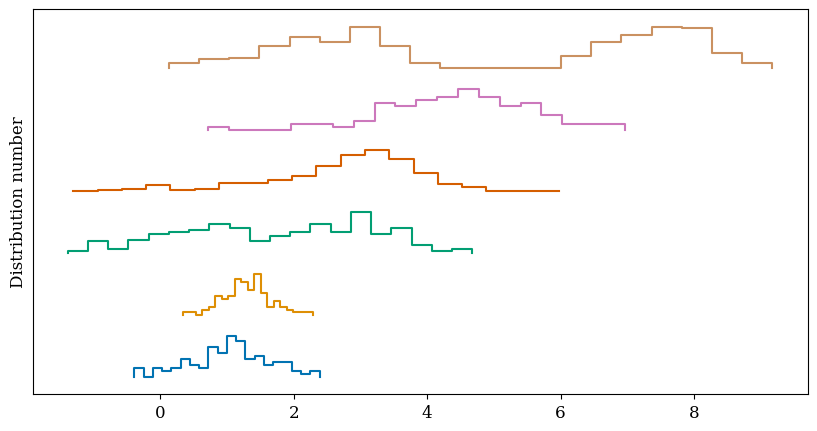

In [23]:
fig, ax = plt.subplots()

y_start = 0
dy = 1.5
for i in range(n_columns):
    plothist(d[i], yoffset=y_start+dy*i, fill=False, ax=ax, peak=1, bins=20)
    
ax.set_ylabel('Distribution number')
ax.set_yticks([])

That is not bad and might often be a good option but it does not summarise things very well.

## Better options - error bars and box plots

We can summarise things in simple ways - that gives us error bars, and the next step is box plots.

/var/folders/bj/l10yvm9m8xlgl2006s6gv0k00000gn/T/ipykernel_31875/429587438.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(xplot, means, stdevs, fmt='o', marker='o', capsize=3)


<ErrorbarContainer object of 3 artists>

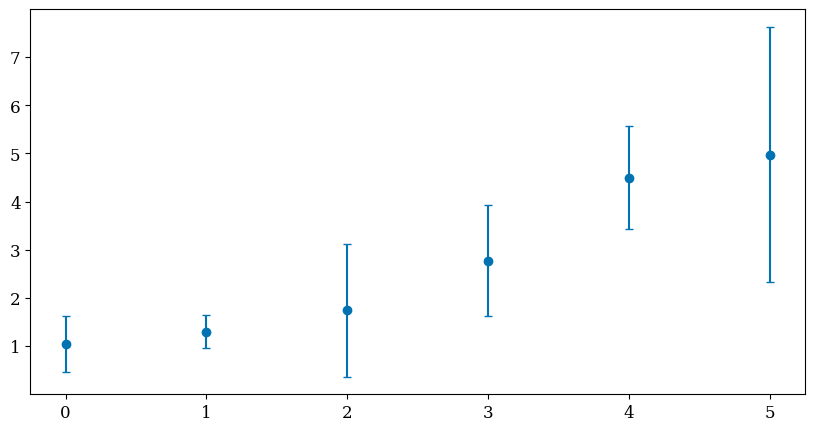

In [24]:
stdevs = np.zeros(n_columns)
means = np.zeros_like(stdevs)
for i in range(n_columns):
    stdevs[i] = np.std(d[i])
    means[i] = np.mean(d[i])

xplot = np.arange(n_columns)
plt.errorbar(xplot, means, stdevs, fmt='o', marker='o', capsize=3)

But that throws away a lot of information and makes it seem as if the errors are symmetric. We can of course improve on this, but let us instead move to box plots.

In [25]:
l = [d[i] for i in range(n_columns)]

/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jarle/miniforge3/envs/mld2024/lib/python3.12/site-packages/seaborn/c

<Axes: >

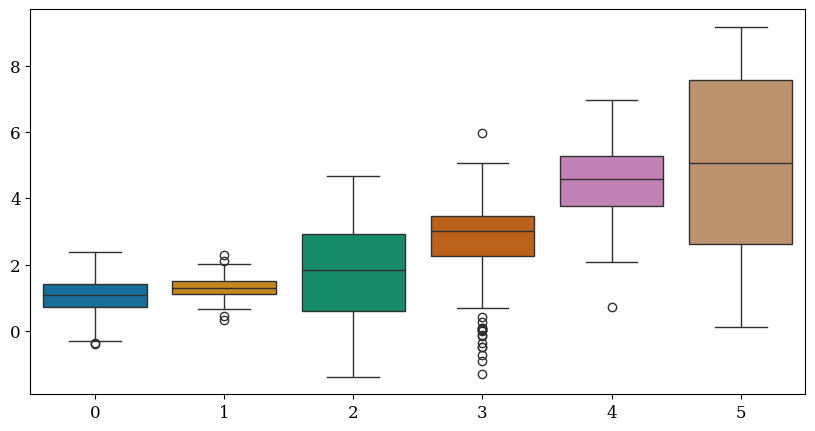

In [26]:
sns.boxplot(data=l)

<Axes: >

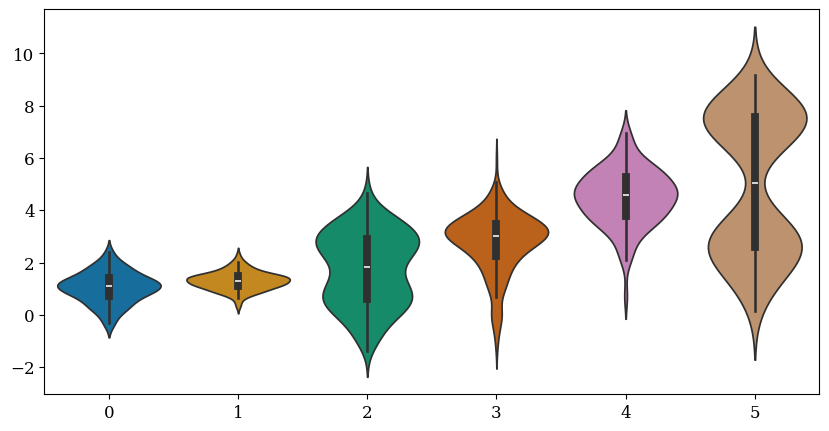

In [28]:
sns.violinplot(data=l, density_norm='width')